## 0. MNIST data (*)

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

&nbsp; a) Check help() on ```keras.datasets.mnist.load_data``` and read to find out how to unpack the data properly. 

&nbsp; b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

&nbsp; c) How many images are there in X_train?

&nbsp; d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

&nbsp; e) Plot 20 sample images. 

&nbsp; f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

<details>

<summary>Hint</summary>

e) A vector or a 1D array can represent one image. 

</details>

<details>

<summary>Answer</summary>

d) 0 and 255. It's grayscale images of 28x28 pixels, where the higher the value, the larger pixel intensity.

<img src = "../assets/MNIST_samples.png" height=100>

e) Shape: X_train: (60000, 784), X_test: (10000, 784)

</details>

---

In [88]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# b) number of images, pixels in x, pixels in y
# c) 60000
# d) 0-255, how much white there is in an image.

x_train[19].max(), y_train[:5]

(255, array([5, 0, 4, 1, 9], dtype=uint8))

(28, 28)

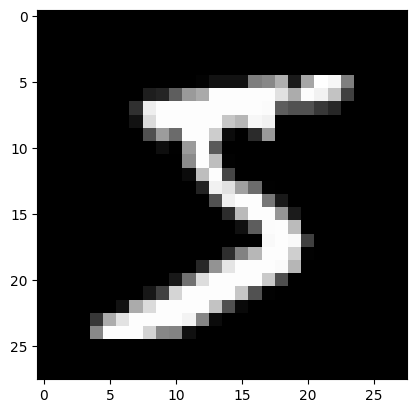

In [89]:
# d)
plt.imshow(x_train[0], cmap="gray")
x_train[0].shape

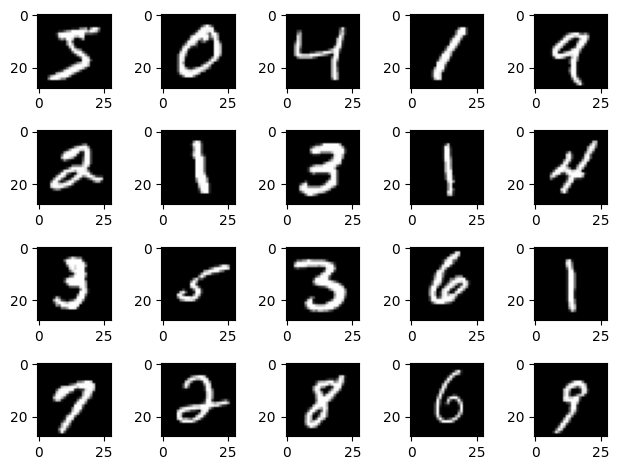

In [90]:
# 05-01 e)
fig, ax = plt.subplots(4, 5, tight_layout=True)
for i in range(20):
    ax.flat[i].imshow(x_train[i], cmap="gray")
    


In [91]:
x = np.array([[[1,2], [3,4]], [[5, 6], [7, 8]]])
y = x.reshape(2, -1)
x.shape, y.shape
y, x


(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]),
 array([[[1, 2],
         [3, 4]],
 
        [[5, 6],
         [7, 8]]]))

In [92]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

---

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16666, random_state=42) 
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((50000, 784), (10000, 784), (50000,), (10000,))

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_list = []
for n in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy_list.append(accuracy_score(y_val, y_pred))

accuracy_list


[0.9752, 0.9637, 0.9724, 0.9716, 0.972, 0.9702, 0.9698, 0.9688, 0.9686]

Text(0, 0.5, 'Accuracy score')

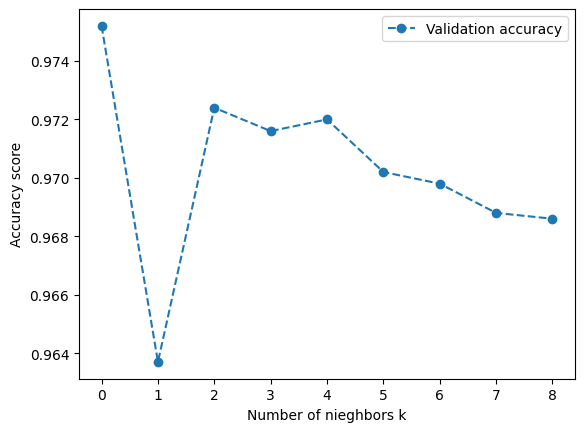

In [95]:
plt.plot(accuracy_list, "o--", label="Validation accuracy")
plt.legend()
plt.xlabel("Number of nieghbors k")
plt.ylabel("Accuracy score")

In [96]:
x_train = np.concatenate((x_train, x_val))
y_train = np.concatenate((y_train, y_val))


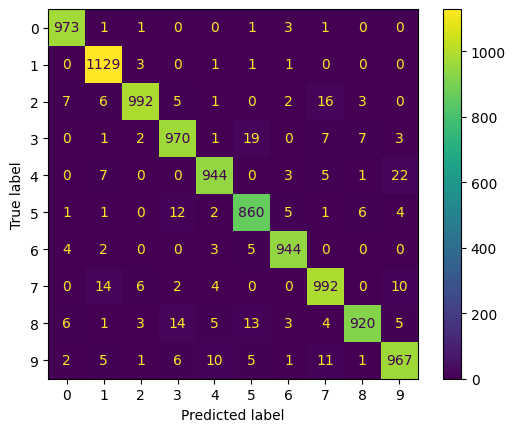

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [99]:
for i, row in enumerate(cm):
    print(f"True label {i}, algorithm misclassified {sum(row) - row[i]} of those")


True label 0, algorithm misclassified 7 of those
True label 1, algorithm misclassified 6 of those
True label 2, algorithm misclassified 40 of those
True label 3, algorithm misclassified 40 of those
True label 4, algorithm misclassified 38 of those
True label 5, algorithm misclassified 32 of those
True label 6, algorithm misclassified 14 of those
True label 7, algorithm misclassified 36 of those
True label 8, algorithm misclassified 54 of those
True label 9, algorithm misclassified 42 of those


---
## 4. Predict your own handwriting (**)

Use a software of your choice to draw a digit, make sure the image size is 28x28 pixels or you have to downscale it. You could also take a photo of a handwritten image, if you scale it properly. Read your image using ```matplotlib.image.imread()```. You will have to convert it into grayscale and scale it to be in same scale as the dataset your model has been trained on. Predict on your digit, was it correct? If not, what could the reason be, and is there something that could be done on preprocessing your image? 

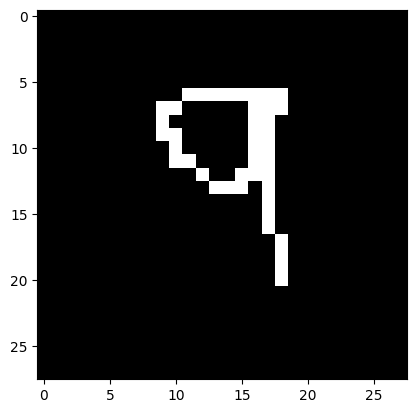

In [100]:
img = plt.imread("../Data/9.png")
plt.imshow(img)


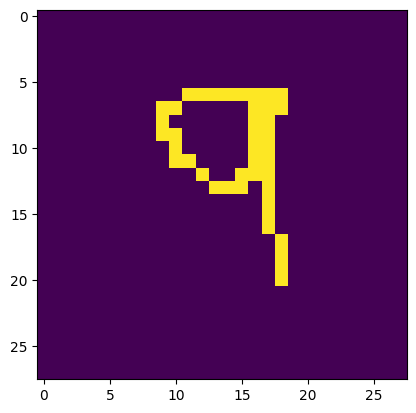

In [101]:
from PIL import Image

img = Image.open("../Data/9.png")
img = np.asarray(img)
img.shape
img = img[:, :, 0]
plt.imshow(img)

In [102]:
img_predict = model.predict(img)

ValueError: X has 28 features, but KNeighborsClassifier is expecting 784 features as input.